In [1]:
import pandas as pd
import numpy as np
# Libraries for visualization:
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score,precision_score

In [2]:
df = load_breast_cancer()

In [3]:
X = df.data
y = df.target

## Train Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## KNN Model

In [5]:
model = KNeighborsClassifier(n_neighbors=4)
y_pred=model.fit(X_train,y_train).predict(X_test)

### Accuracy

In [6]:
accuracy=accuracy_score(y_pred,y_test)

### F1 score

In [7]:
f1=f1_score(y_pred,y_test)

### Precision

In [8]:
precision=precision_score(y_pred,y_test)

### Recall

In [9]:
recall=recall_score(y_pred,y_test)

## Visualize Results

In [10]:
results=pd.DataFrame({"Values":[accuracy,f1,precision,recall],
                     "Metrics":["Accuracy","F1","Precision","Recall"]})
fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(x=[round(i,5) for i in results["Values"]],
                    y=results["Metrics"],
                    text=[round(i,5) for i in results["Values"]],orientation="h",textposition="inside",name="Values",
                    marker=dict(color=["indianred","firebrick","palegreen","skyblue","plum"],line_color="beige",line_width=1.5)),row=1,col=1)
fig.update_layout(title={'text': model.__class__.__name__ ,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_xaxes(range=[0,1], row = 1, col = 1)

iplot(fig)

### Confusion Matrix

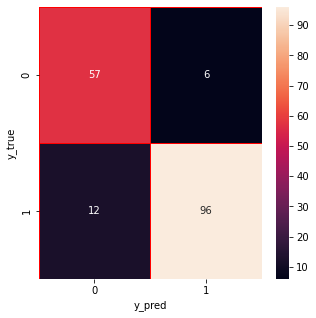

In [11]:
cm = confusion_matrix(y_test, y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Maximum accuracy:- 0.9415204678362573 at K = 7


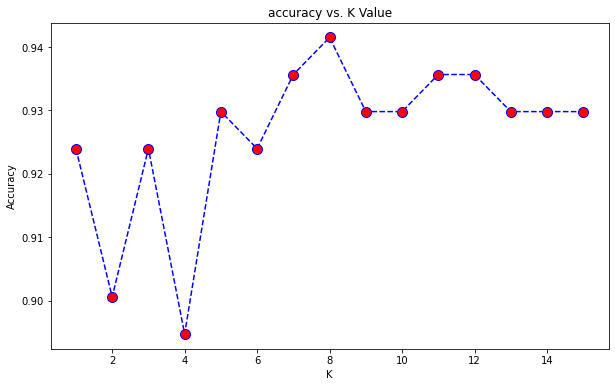

In [12]:
acc = []
from sklearn import metrics
for i in range(1,16):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,16),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

### Best K value result

In [13]:
model = KNeighborsClassifier(n_neighbors=7)
y_pred=model.fit(X_train,y_train).predict(X_test)
accuracy=accuracy_score(y_pred,y_test)
f1=f1_score(y_pred,y_test)
precision=precision_score(y_pred,y_test)
recall=recall_score(y_pred,y_test)

results=pd.DataFrame({"Values":[accuracy,f1,precision,recall],
                     "Metrics":["Accuracy","F1","Precision","Recall"]})
fig=make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(x=[round(i,5) for i in results["Values"]],
                    y=results["Metrics"],
                    text=[round(i,5) for i in results["Values"]],orientation="h",textposition="inside",name="Values",
                    marker=dict(color=["indianred","firebrick","palegreen","skyblue","plum"],line_color="beige",line_width=1.5)),row=1,col=1)
fig.update_layout(title={'text': model.__class__.__name__ ,
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_xaxes(range=[0,1], row = 1, col = 1)

iplot(fig)

### Confusion Matrix

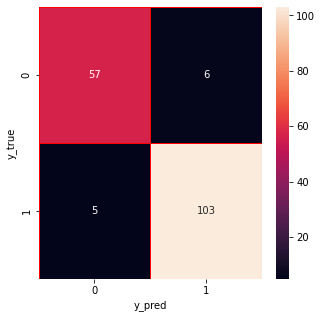

In [14]:
cm = confusion_matrix(y_test, y_pred)
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()